In [102]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [103]:
df= pd.read_csv('train.csv')

In [104]:
df.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793


In [105]:
df.shape

(2400, 14)

In [106]:
print(df['spacegroup'].unique())

[ 33 194 227 167 206  12]


In [107]:
df.isnull().sum()

id                            0
spacegroup                    0
number_of_total_atoms         0
percent_atom_al               0
percent_atom_ga               0
percent_atom_in               0
lattice_vector_1_ang          0
lattice_vector_2_ang          0
lattice_vector_3_ang          0
lattice_angle_alpha_degree    0
lattice_angle_beta_degree     0
lattice_angle_gamma_degree    0
formation_energy_ev_natom     0
bandgap_energy_ev             0
dtype: int64

In [108]:
df.drop(['id','formation_energy_ev_natom'],axis=1,inplace=True)

In [109]:
df.head()

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,bandgap_energy_ev
0,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,3.4387
1,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,2.9210
2,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,2.7438
3,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,3.3492
4,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,1.3793


In [110]:
for col in df.columns[0:]:
    print(col, ':',len(df[col].unique()), 'labels')

spacegroup : 6 labels
number_of_total_atoms : 6 labels
percent_atom_al : 42 labels
percent_atom_ga : 42 labels
percent_atom_in : 42 labels
lattice_vector_1_ang : 1288 labels
lattice_vector_2_ang : 1216 labels
lattice_vector_3_ang : 1210 labels
lattice_angle_alpha_degree : 457 labels
lattice_angle_beta_degree : 566 labels
lattice_angle_gamma_degree : 434 labels
bandgap_energy_ev : 2307 labels


In [111]:
df.spacegroup.value_counts().to_dict()

{206: 490, 33: 432, 227: 393, 167: 374, 12: 358, 194: 353}

In [112]:
df_frequency_map = df.spacegroup.value_counts().to_dict()

In [113]:
df.spacegroup = df.spacegroup.map(df_frequency_map )

In [114]:
df.head()

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,bandgap_energy_ev
0,432,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,3.4387
1,353,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,2.9210
2,393,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,2.7438
3,374,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,3.3492
4,353,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,1.3793


In [115]:
df.corr()

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,bandgap_energy_ev
spacegroup,1.000000,0.333450,-0.056223,-0.108307,0.152906,-0.151314,0.857386,-0.423556,-0.046314,-0.402115,-0.252114,0.051395
number_of_total_atoms,0.333450,1.000000,-0.106022,-0.012030,0.117657,0.397917,0.651364,-0.002656,-0.172047,0.039425,0.055687,-0.106125
percent_atom_al,-0.056223,-0.106022,1.000000,-0.450122,-0.609300,-0.154387,-0.179604,0.032261,0.019183,-0.099428,-0.019175,0.738622
percent_atom_ga,-0.108307,-0.012030,-0.450122,1.000000,-0.433809,0.100244,-0.125285,-0.024424,0.000648,0.128669,0.010230,0.012831
percent_atom_in,0.152906,0.117657,-0.609300,-0.433809,1.000000,0.066761,0.292472,-0.010866,-0.019929,-0.013933,0.010259,-0.756668
lattice_vector_1_ang,-0.151314,0.397917,-0.154387,0.100244,0.066761,1.000000,-0.017117,-0.560387,0.002739,0.850079,-0.303708,-0.138901
lattice_vector_2_ang,0.857386,0.651364,-0.179604,-0.125285,0.292472,-0.017117,1.000000,-0.256180,-0.114209,-0.365709,-0.146586,-0.127461
lattice_vector_3_ang,-0.423556,-0.002656,0.032261,-0.024424,-0.010866,-0.560387,-0.256180,1.000000,0.071834,-0.471228,0.328274,-0.156865
lattice_angle_alpha_degree,-0.046314,-0.172047,0.019183,0.000648,-0.019929,0.002739,-0.114209,0.071834,1.000000,0.189144,-0.446694,-0.072313
lattice_angle_beta_degree,-0.402115,0.039425,-0.099428,0.128669,-0.013933,0.850079,-0.365709,-0.471228,0.189144,1.000000,-0.195319,-0.077048


In [85]:
import seaborn as sns

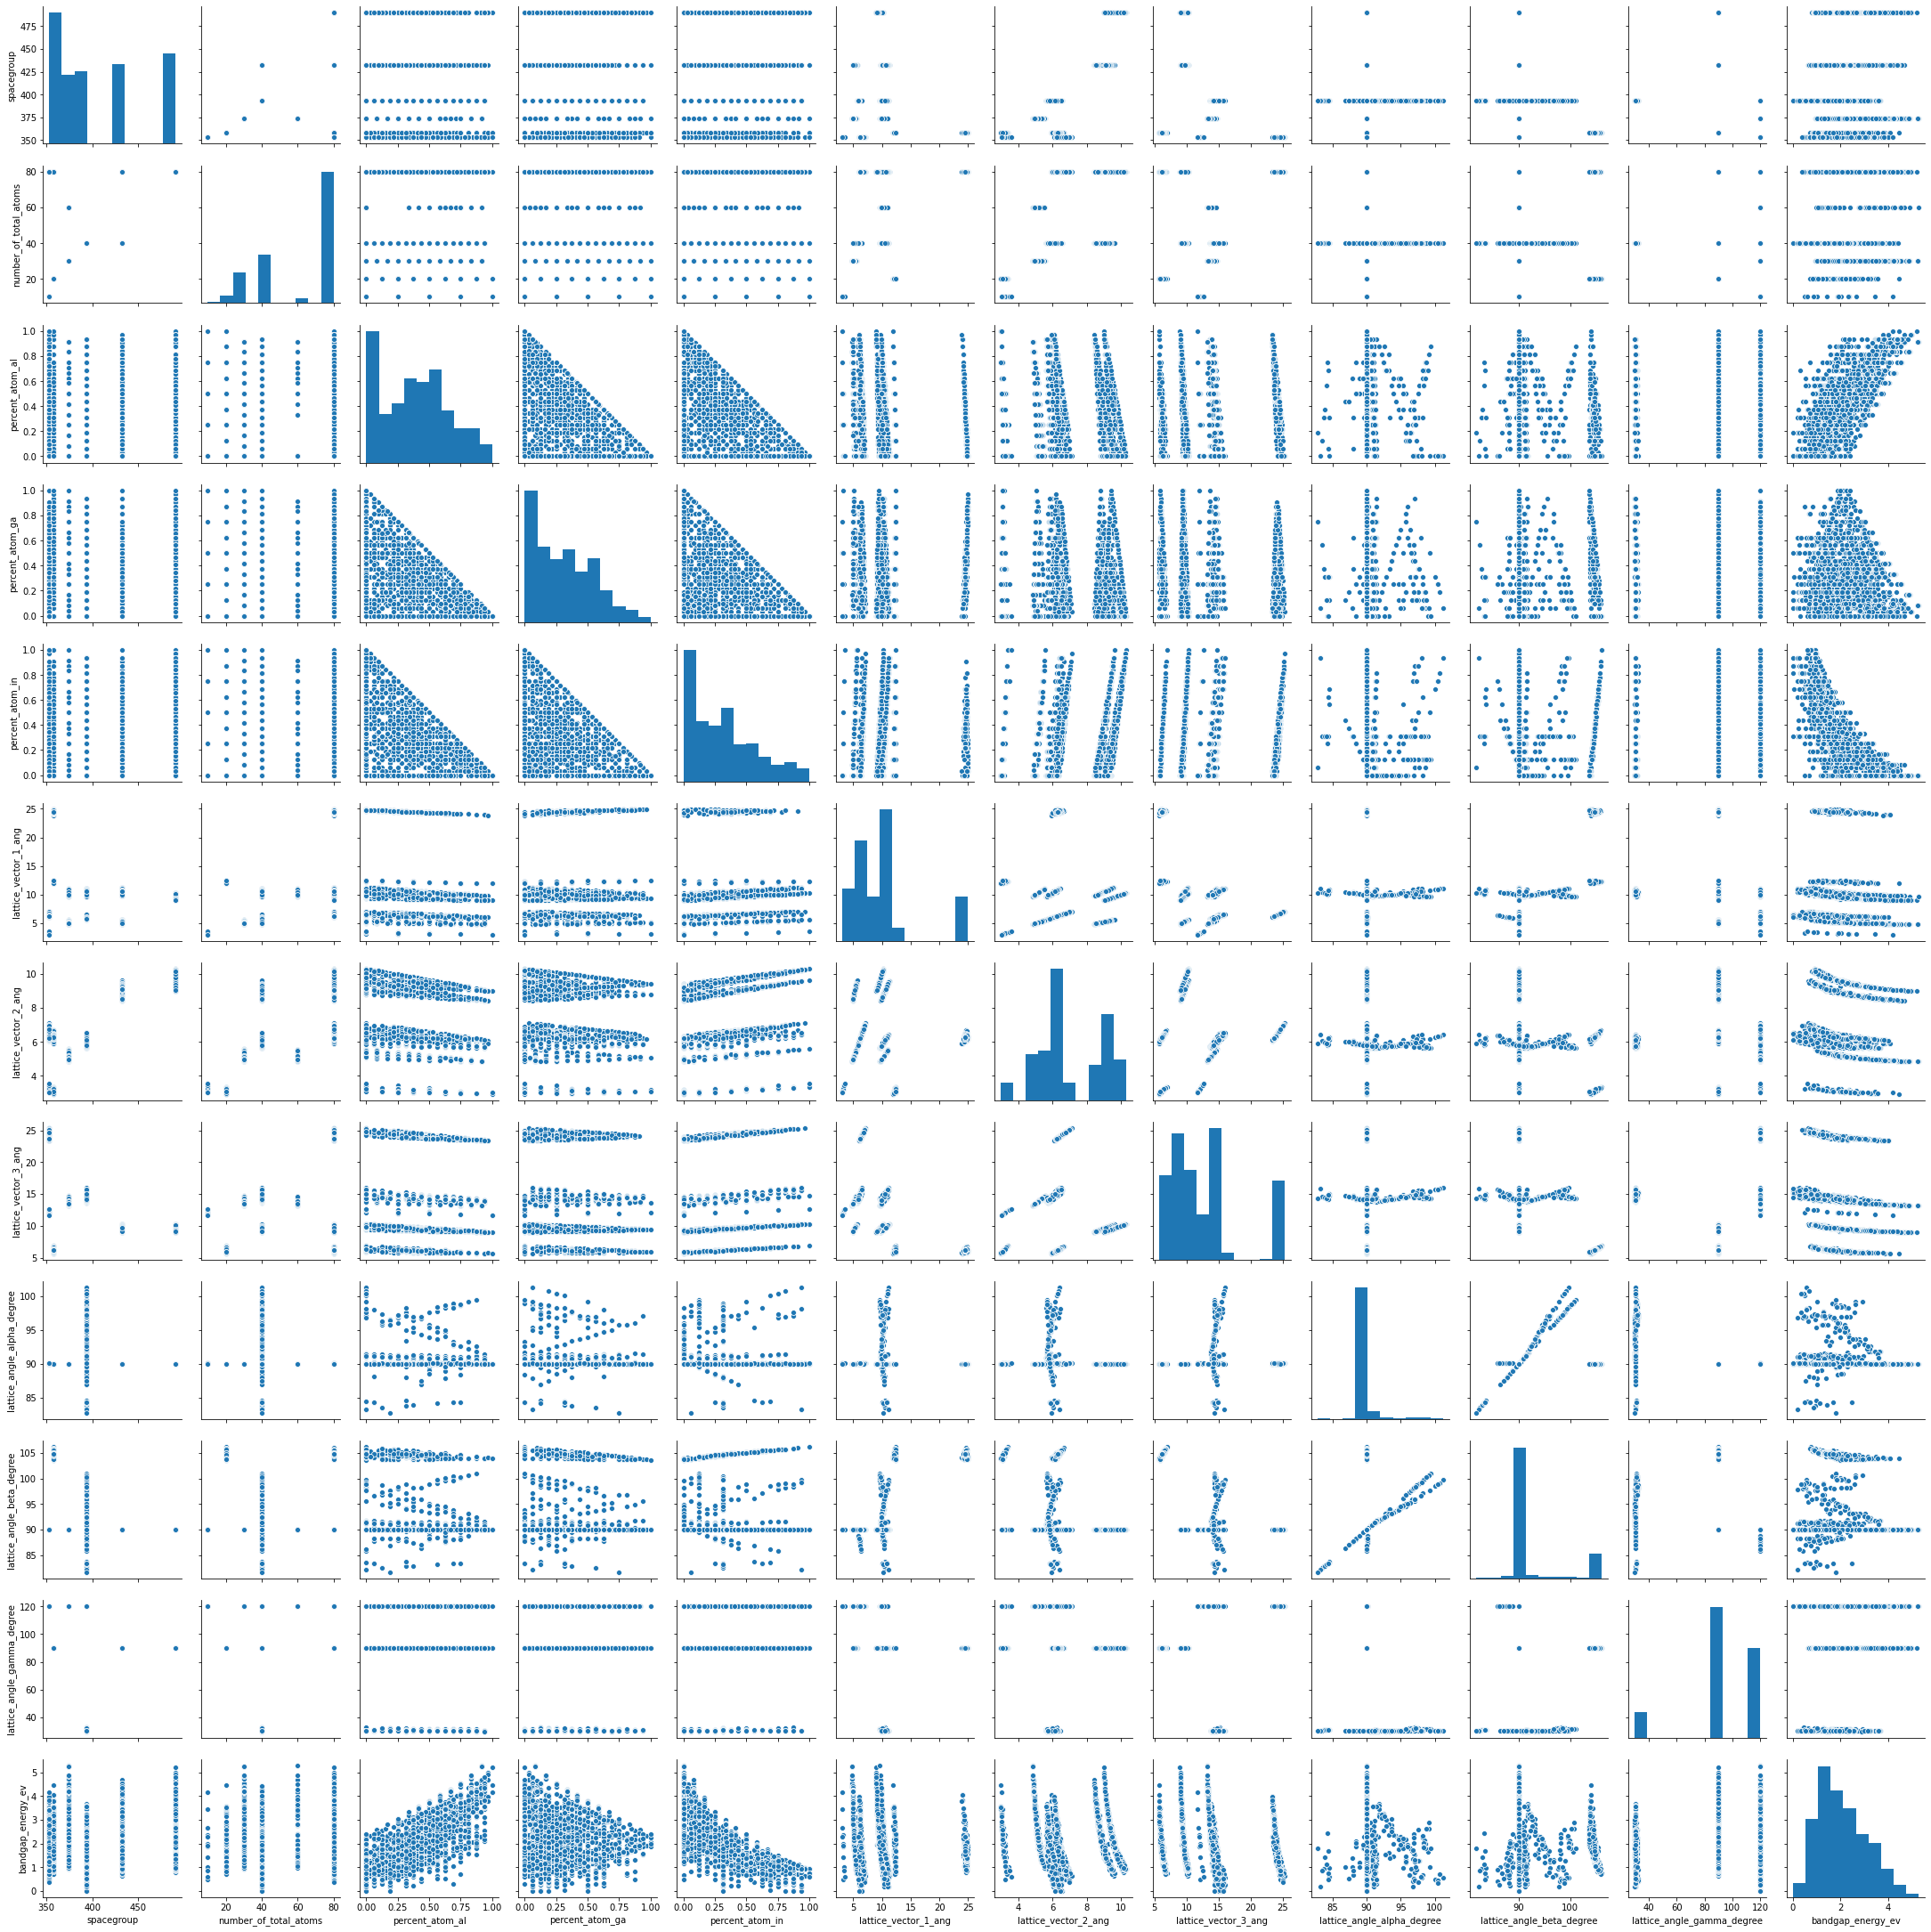

In [148]:
sns.pairplot(df)

In [116]:
import matplotlib.pyplot as plot
%matplotlib inline

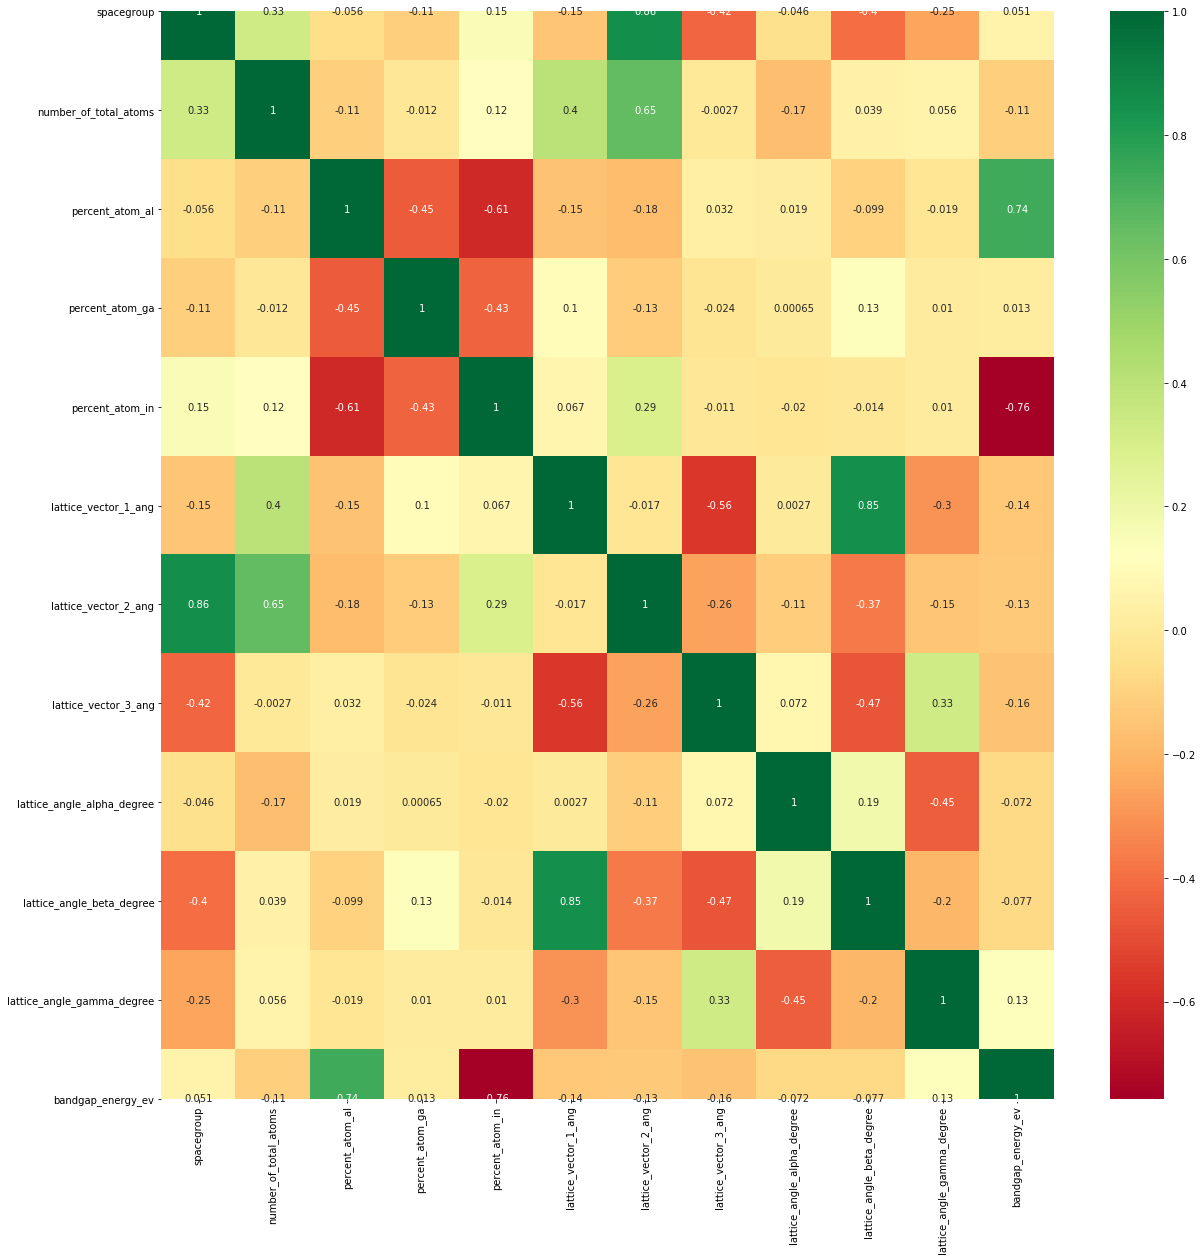

In [117]:
corrmat=df.corr()
top_corr_features=corrmat.index
plot.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [118]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1]

In [119]:
print(X)

[[4.320000e+02 8.000000e+01 6.250000e-01 ... 9.000260e+01 9.000230e+01
  9.000170e+01]
 [3.530000e+02 8.000000e+01 6.250000e-01 ... 9.001860e+01 8.999800e+01
  1.200025e+02]
 [3.930000e+02 4.000000e+01 8.125000e-01 ... 9.096880e+01 9.112280e+01
  3.051850e+01]
 ...
 [4.900000e+02 8.000000e+01 4.375000e-01 ... 9.000470e+01 9.000460e+01
  8.999540e+01]
 [4.320000e+02 8.000000e+01 3.125000e-01 ... 9.000150e+01 8.999960e+01
  9.000040e+01]
 [4.900000e+02 8.000000e+01 8.750000e-01 ... 9.000270e+01 9.000370e+01
  8.999870e+01]]


In [120]:
print(Y)

0       3.4387
1       2.9210
2       2.7438
3       3.3492
4       1.3793
         ...  
2395    3.7349
2396    3.4915
2397    3.2750
2398    1.3915
2399    4.2107
Name: bandgap_energy_ev, Length: 2400, dtype: float64


In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

In [122]:
print(X_train)

[[4.900000e+02 8.000000e+01 3.120000e-02 ... 9.000290e+01 9.000260e+01
  8.999620e+01]
 [4.320000e+02 8.000000e+01 5.312000e-01 ... 9.000240e+01 9.000170e+01
  9.000110e+01]
 [3.580000e+02 8.000000e+01 4.375000e-01 ... 8.999970e+01 1.045965e+02
  9.000010e+01]
 ...
 [3.580000e+02 8.000000e+01 5.000000e-01 ... 8.999960e+01 1.047008e+02
  9.000010e+01]
 [3.740000e+02 3.000000e+01 4.167000e-01 ... 8.999400e+01 9.000580e+01
  1.200013e+02]
 [3.580000e+02 8.000000e+01 3.120000e-02 ... 9.000030e+01 1.054012e+02
  9.000000e+01]]


In [123]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,:]=sc.fit_transform(X_train[:,:])
X_test[:,:]=sc.transform(X_test[:,:])

In [124]:
X_test

array([[-0.95832077, -1.86084414, -0.51187359, ..., -0.17101069,
         2.51437031, -0.17640498],
       [-1.05775914,  0.80208374, -0.39380165, ..., -0.15984839,
        -0.4485937 ,  0.98241332],
       [-0.64011797, -1.41702283, -0.19663666, ..., -0.17478386,
        -0.44808378,  0.98281518],
       ...,
       [ 1.66685233,  0.80208374,  2.20832215, ..., -0.1690455 ,
        -0.44853704, -0.17643975],
       [-0.95832077,  0.80208374,  0.19769333, ..., -0.17124652,
         2.32303771, -0.17640498],
       [ 1.66685233,  0.80208374,  1.85334947, ..., -0.16943854,
        -0.44865035, -0.17643589]])

In [125]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [126]:
from sklearn.model_selection import RandomizedSearchCV

In [127]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [128]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [129]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [130]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, para
                               m_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [131]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [132]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [133]:
rf_random.best_score_

-0.05628823282792938

In [134]:
predictions=rf_random.predict(X_test)

C:\Users\Mypc\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


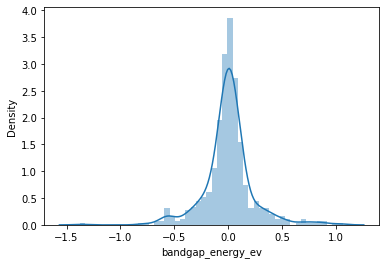

In [135]:
sns.distplot(Y_test-predictions)

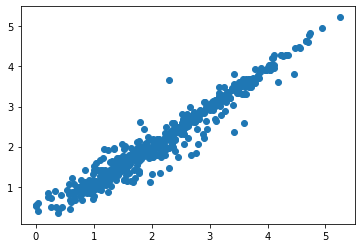

In [136]:
plt.scatter(Y_test,predictions)

In [137]:
from sklearn.metrics import r2_score
r2_score(Y_test,predictions)

0.9482697172727589

In [138]:
df2= pd.read_csv('train.csv')

In [139]:
df2.drop(['id','bandgap_energy_ev'],axis=1,inplace=True)

In [140]:
for col in df2.columns[0:]:
    print(col, ':',len(df2[col].unique()), 'labels')

spacegroup : 6 labels
number_of_total_atoms : 6 labels
percent_atom_al : 42 labels
percent_atom_ga : 42 labels
percent_atom_in : 42 labels
lattice_vector_1_ang : 1288 labels
lattice_vector_2_ang : 1216 labels
lattice_vector_3_ang : 1210 labels
lattice_angle_alpha_degree : 457 labels
lattice_angle_beta_degree : 566 labels
lattice_angle_gamma_degree : 434 labels
formation_energy_ev_natom : 1733 labels


In [141]:
df2.spacegroup.value_counts().to_dict()

{206: 490, 33: 432, 227: 393, 167: 374, 12: 358, 194: 353}

In [142]:
df2_frequency_map = df2.spacegroup.value_counts().to_dict()

In [143]:
df2.spacegroup = df2.spacegroup.map(df2_frequency_map )

In [144]:
df2.corr()

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom
spacegroup,1.000000,0.333450,-0.056223,-0.108307,0.152906,-0.151314,0.857386,-0.423556,-0.046314,-0.402115,-0.252114,-0.179970
number_of_total_atoms,0.333450,1.000000,-0.106022,-0.012030,0.117657,0.397917,0.651364,-0.002656,-0.172047,0.039425,0.055687,-0.048631
percent_atom_al,-0.056223,-0.106022,1.000000,-0.450122,-0.609300,-0.154387,-0.179604,0.032261,0.019183,-0.099428,-0.019175,0.108481
percent_atom_ga,-0.108307,-0.012030,-0.450122,1.000000,-0.433809,0.100244,-0.125285,-0.024424,0.000648,0.128669,0.010230,-0.374817
percent_atom_in,0.152906,0.117657,-0.609300,-0.433809,1.000000,0.066761,0.292472,-0.010866,-0.019929,-0.013933,0.010259,0.223383
lattice_vector_1_ang,-0.151314,0.397917,-0.154387,0.100244,0.066761,1.000000,-0.017117,-0.560387,0.002739,0.850079,-0.303708,-0.225600
lattice_vector_2_ang,0.857386,0.651364,-0.179604,-0.125285,0.292472,-0.017117,1.000000,-0.256180,-0.114209,-0.365709,-0.146586,-0.104137
lattice_vector_3_ang,-0.423556,-0.002656,0.032261,-0.024424,-0.010866,-0.560387,-0.256180,1.000000,0.071834,-0.471228,0.328274,0.454679
lattice_angle_alpha_degree,-0.046314,-0.172047,0.019183,0.000648,-0.019929,0.002739,-0.114209,0.071834,1.000000,0.189144,-0.446694,0.099277
lattice_angle_beta_degree,-0.402115,0.039425,-0.099428,0.128669,-0.013933,0.850079,-0.365709,-0.471228,0.189144,1.000000,-0.195319,-0.213651


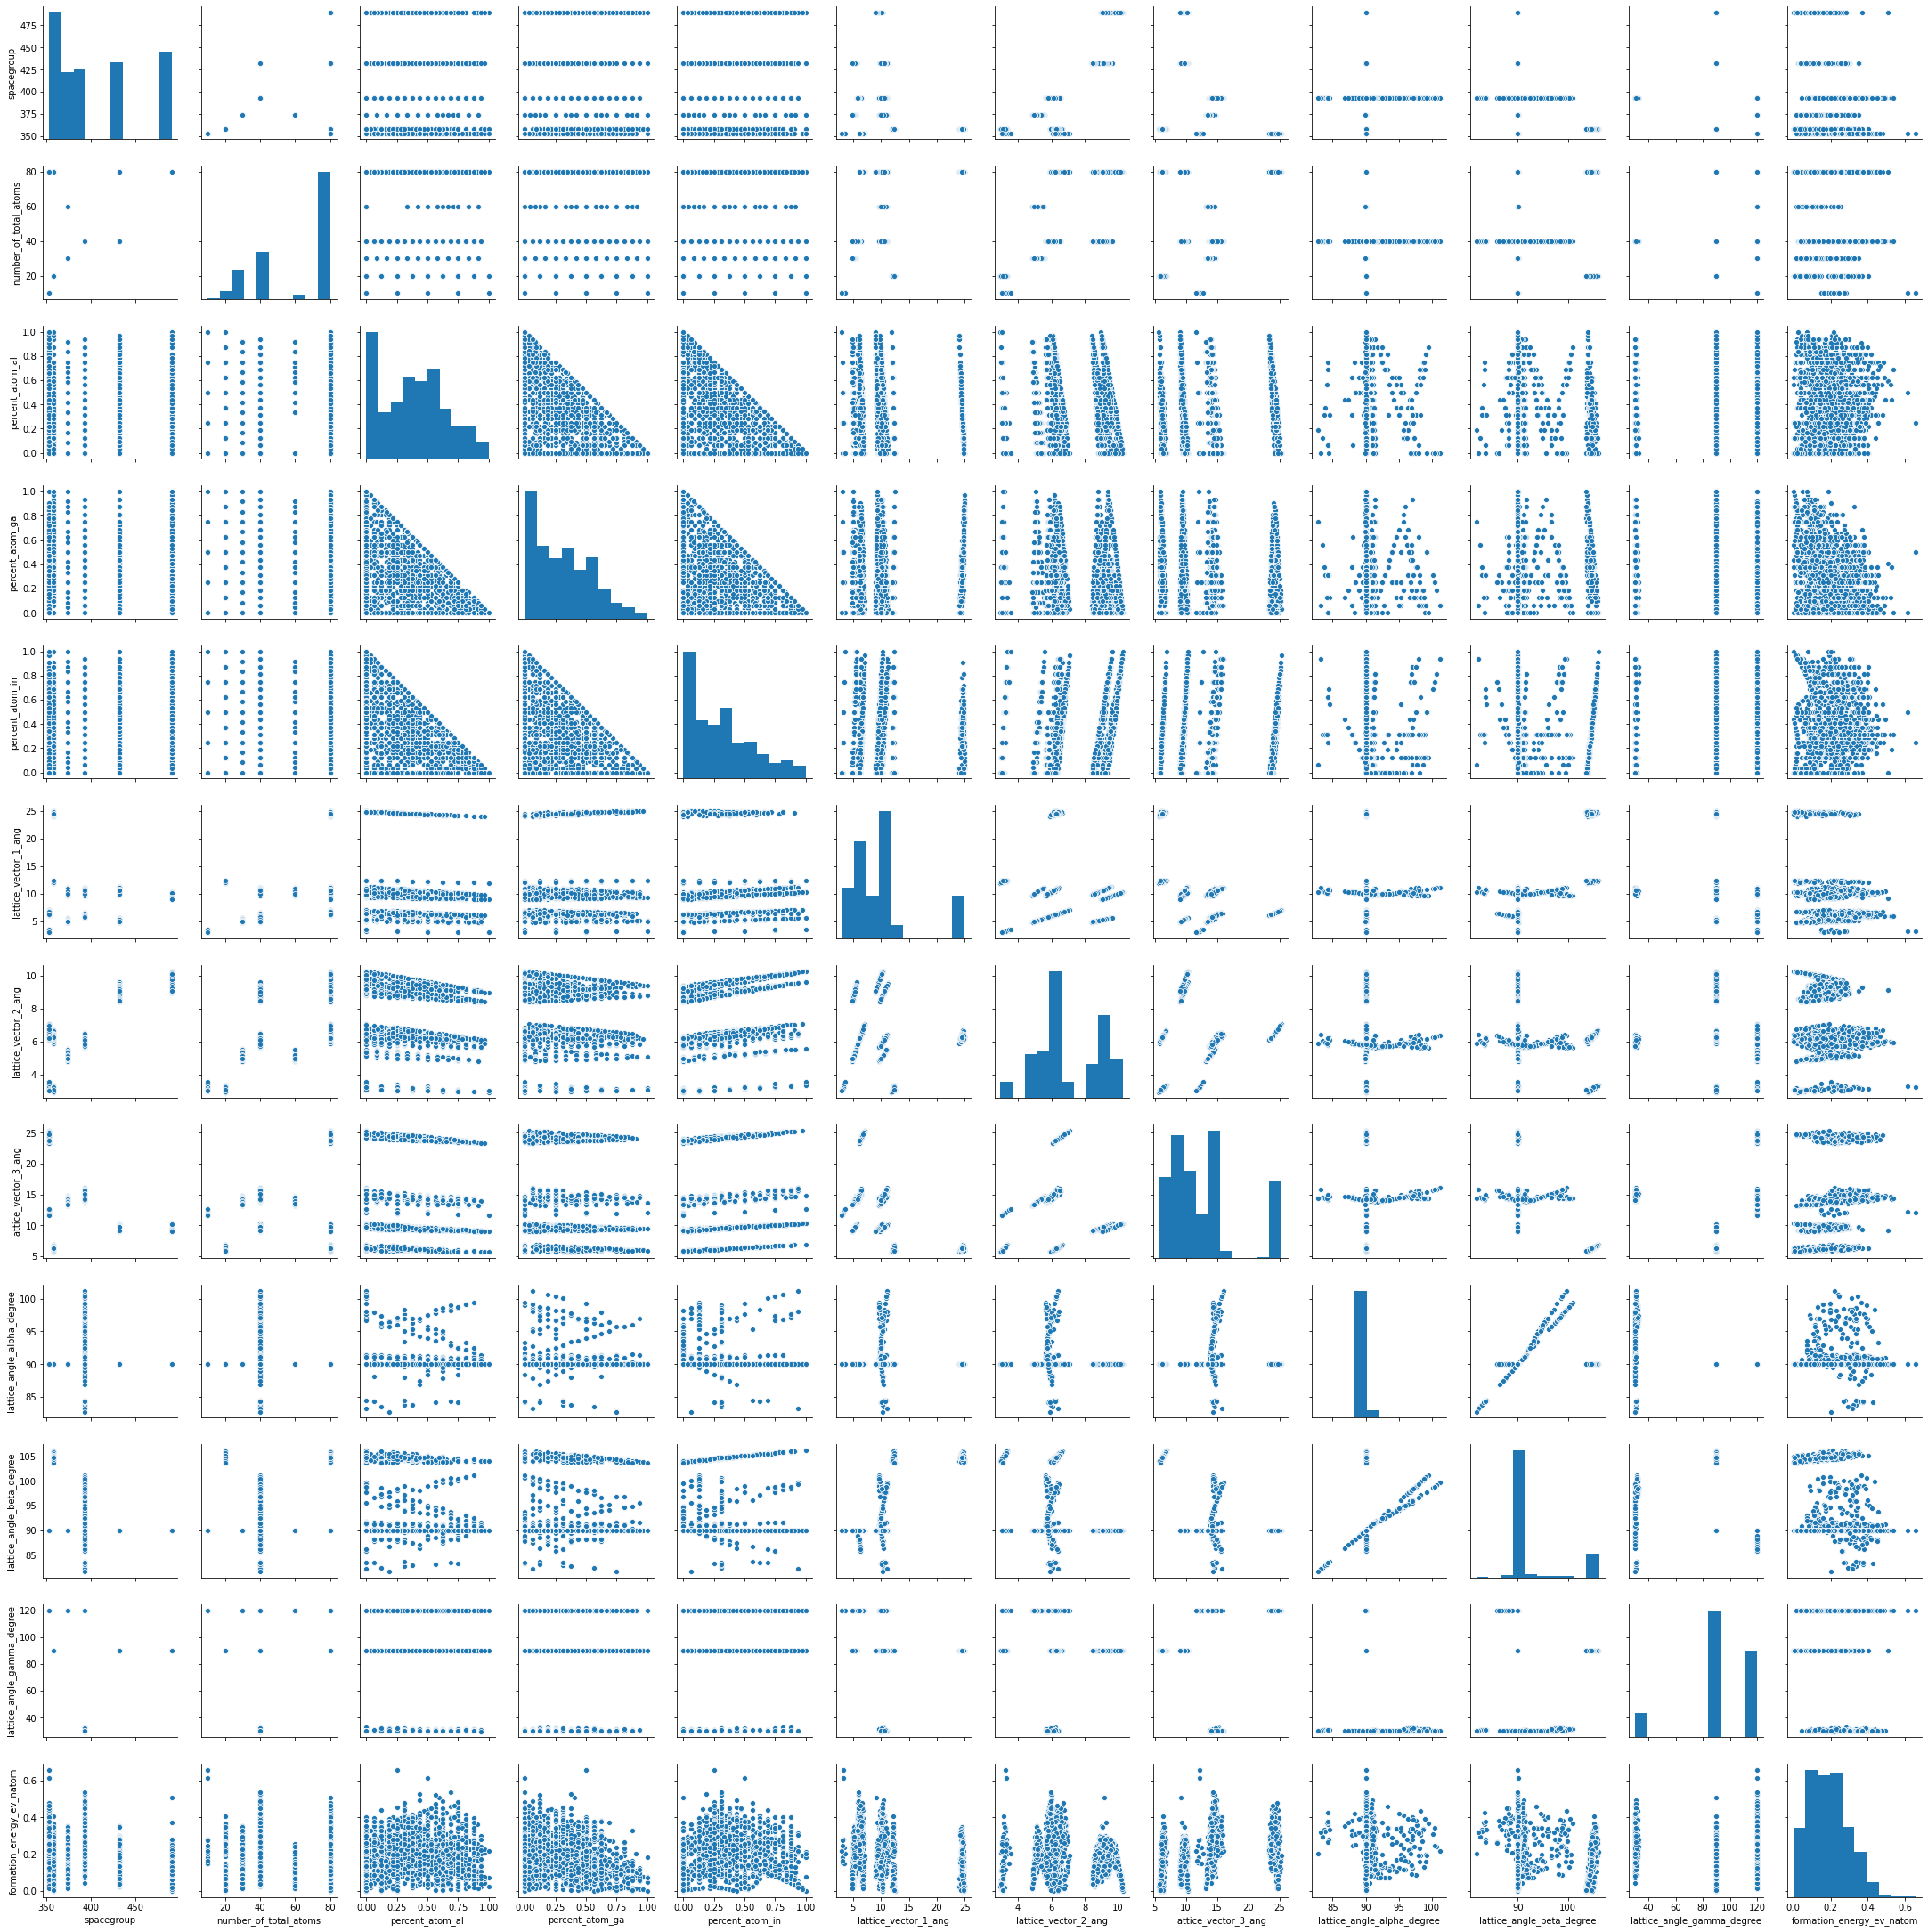

In [170]:
sns.pairplot(df2)

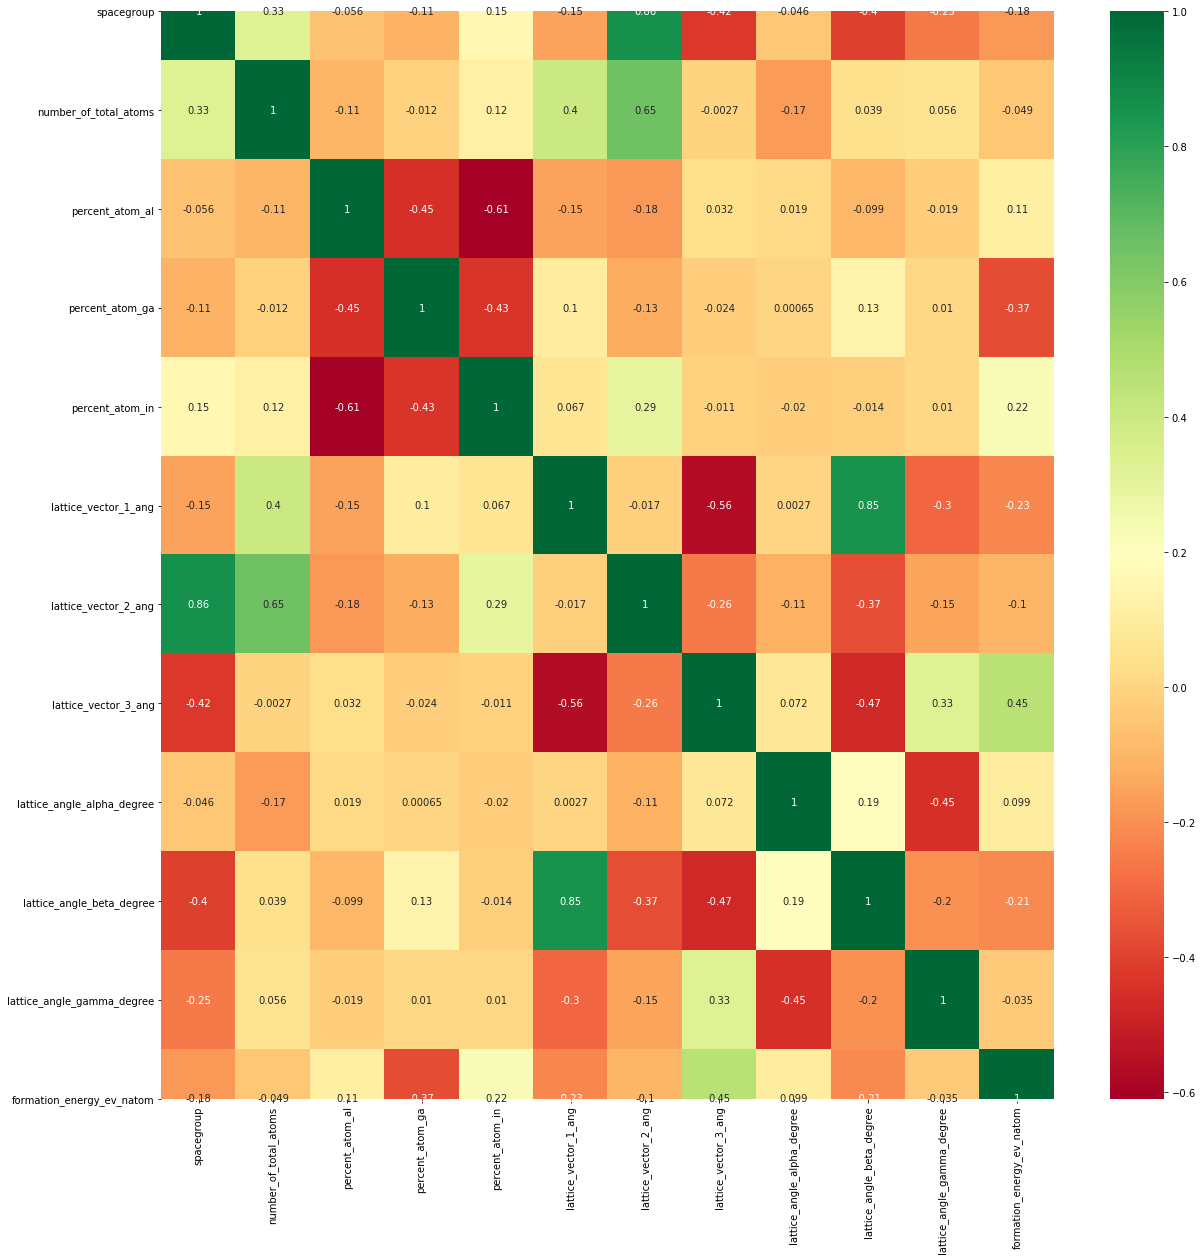

In [148]:
corrmat2=df2.corr()
top_corr_features2=corrmat2.index
plot.figure(figsize=(20,20))
g=sns.heatmap(df2[top_corr_features2].corr(),annot=True,cmap='RdYlGn')

In [149]:
X2=df2.iloc[:,:-1].values
Y2=df2.iloc[:,-1]

In [150]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=0.25,random_state=1)

In [151]:
from sklearn.preprocessing import StandardScaler
sc2=StandardScaler()
X2_train[:,:]=sc2.fit_transform(X2_train[:,:])
X2_test[:,:]=sc2.transform(X2_test[:,:])

In [153]:
import numpy as np
n_estimators2 = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [154]:
from sklearn.model_selection import RandomizedSearchCV

In [155]:
#Randomized Search CV

# Number of trees in random forest
n_estimators2 = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features2 = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth2 = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split2 = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf2 = [1, 2, 5, 10]

In [156]:
# Create the random grid
random_grid2 = {'n_estimators': n_estimators2,
               'max_features': max_features2,
               'max_depth': max_depth2,
               'min_samples_split': min_samples_split2,
               'min_samples_leaf': min_samples_leaf2}

print(random_grid2)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [157]:
rf2 = RandomForestRegressor()

In [62]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random2 = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid2,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [158]:
rf_random2.fit(X2_train,Y2_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [159]:
rf_random2.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [160]:
rf_random2.best_score_

-0.0018218929166000238

In [161]:
predictions2=rf_random2.predict(X2_test)

C:\Users\Mypc\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


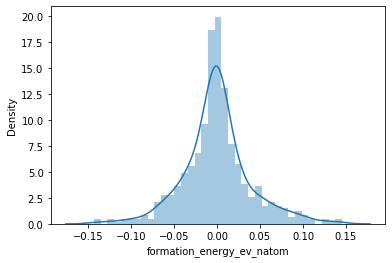

In [162]:
sns.distplot(Y2_test-predictions2)

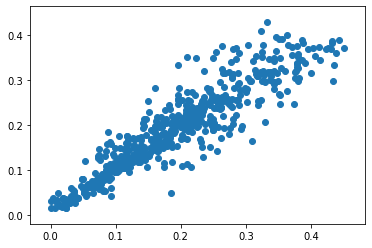

In [163]:
plt.scatter(Y2_test,predictions2)

In [164]:
r2_score(Y2_test,predictions2)

0.8530873470198991